In [2]:
import os
import pandas as pd
import random
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

C:\Users\ASHIK C SABU\AppData\Local\Temp\ipykernel_18408\4009285949.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [3]:
# Getting TESS data:
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('D:\SPEECH_RECOG\TESS'):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))
        
        label = filename[::-1].split('_')[0][::-1]
        labels.append(label[:-4].lower())

df_tess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'TESS', 'emotion':labels})

df_tess['emotion'] = df_tess['emotion'].replace(['ps'], 'surprise')
                  
df_tess.sample(5)

path  duration dataset  \
1371   D:\SPEECH_RECOG\TESS\OAF_Sad\OAF_thought_sad.wav     2.274    TESS   
2145  D:\SPEECH_RECOG\TESS\YAF_happy\YAF_sail_happy.wav     1.921    TESS   
509     D:\SPEECH_RECOG\TESS\OAF_Fear\OAF_name_fear.wav     1.533    TESS   
1212       D:\SPEECH_RECOG\TESS\OAF_Sad\OAF_cab_sad.wav     2.329    TESS   
2619      D:\SPEECH_RECOG\TESS\YAF_sad\YAF_chat_sad.wav     2.286    TESS   

     emotion  
1371     sad  
2145   happy  
509     fear  
1212     sad  
2619     sad

In [4]:
df_tess.shape

(2800, 4)

In [5]:
df_tess['emotion'].value_counts()

emotion
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64

In [6]:
# Getting RAVDESS data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('D:\SPEECH_RECOG\RAVDESS'):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        duration.append(round(librosa.get_duration(filename=paths[-1]), 3)) 
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')       

df_ravdess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'RAVDESS', 'emotion':labels})

df_ravdess.sample(5)

path  duration  dataset  \
1798  D:\SPEECH_RECOG\RAVDESS\audio_speech_actors_01...     3.303  RAVDESS   
1040  D:\SPEECH_RECOG\RAVDESS\Actor_18\03-01-04-01-0...     3.570  RAVDESS   
613   D:\SPEECH_RECOG\RAVDESS\Actor_11\03-01-03-01-0...     3.203  RAVDESS   
2549  D:\SPEECH_RECOG\RAVDESS\audio_speech_actors_01...     3.704  RAVDESS   
1214  D:\SPEECH_RECOG\RAVDESS\Actor_21\03-01-03-01-0...     3.704  RAVDESS   

       emotion  
1798  surprise  
1040       sad  
613      happy  
2549     angry  
1214     happy

In [7]:
df_ravdess.shape

(2880, 4)

In [8]:
df_ravdess['emotion'].value_counts()

emotion
calm        384
happy       384
sad         384
angry       384
fear        384
disgust     384
surprise    384
neutral     192
Name: count, dtype: int64

In [9]:
# Getting SAVEE data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('D:\SPEECH_RECOG\SAVEE\AudioData'):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))
        
        label = filename[::-1].split('_')[0][::-1]
        
        if label[:1] == 'a':
            labels.append('angry')
        elif label[:1] == 'd':
            labels.append('disgust')
        elif label[:1] == 'f':
            labels.append('fear')
        elif label[:1] == 'h':
            labels.append('happy')
        elif label[:1] == 'n':
            labels.append('neutral')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad')
            else:
                labels.append('surprise')

paths = paths[1:] # to filter out 'info.txt' file

for file in paths:
    duration.append(round(librosa.get_duration(filename=file), 3)) 

df_savee = pd.DataFrame({'path':paths, 'duration': duration, 'dataset': 'SAVEE', 'emotion':labels})
                  
df_savee.sample(5)

path  duration dataset  emotion
435   D:\SPEECH_RECOG\SAVEE\AudioData\KL\n16.wav     3.826   SAVEE  neutral
413   D:\SPEECH_RECOG\SAVEE\AudioData\KL\h09.wav     3.057   SAVEE    happy
60    D:\SPEECH_RECOG\SAVEE\AudioData\DC\n01.wav     3.774   SAVEE  neutral
71    D:\SPEECH_RECOG\SAVEE\AudioData\DC\n12.wav     2.973   SAVEE  neutral
458  D:\SPEECH_RECOG\SAVEE\AudioData\KL\sa09.wav     2.589   SAVEE      sad

In [14]:
# Getting SAVEE data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('D:\SPEECH_RECOG\CREMA'):
    for filename in filenames:
        
        paths.append(os.path.join(dirname, filename))

        duration.append(round(librosa.get_duration(filename=paths[-1]), 3)) 
        
for i in paths:
    if 'SAD' in i:
        labels.append('sad')
    elif 'ANG' in i:
        labels.append('angry')
    elif 'DIS' in i:
        labels.append('disgust')
    elif 'FEA' in i:
        labels.append('fear')
    elif 'HAP' in i:
        labels.append('happy')
    elif 'NEU' in i:
        labels.append('neutral')

df_crema = pd.DataFrame({'path':paths, 'duration': duration, 'dataset': 'CREMA', 'emotion':labels})
                  
df_crema.sample(5)

path  duration dataset  emotion
1619  D:\SPEECH_RECOG\CREMA\1020_WSI_NEU_XX.wav     2.302   CREMA  neutral
4524  D:\SPEECH_RECOG\CREMA\1056_ITH_SAD_XX.wav     1.869   CREMA      sad
929   D:\SPEECH_RECOG\CREMA\1012_IWL_ANG_XX.wav     2.636   CREMA    angry
2856  D:\SPEECH_RECOG\CREMA\1036_DFA_SAD_XX.wav     2.636   CREMA      sad
4776  D:\SPEECH_RECOG\CREMA\1059_ITS_SAD_XX.wav     1.935   CREMA      sad

In [15]:
df_crema.shape

(7442, 4)

In [17]:
df_crema['emotion'].value_counts()

emotion
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64

In [10]:
df = pd.concat([df_tess, df_ravdess, df_savee])

# Dropping 'calm' as out the scope (also not many samples)
df = df[df['emotion'].str.contains('calm') == False].reset_index(drop=True)

print('The dataset has {} audio files. Below printed 5 random entries:'.format(df.shape[0]))

df.sample(5)

The dataset has 5776 audio files. Below printed 5 random entries:


path  duration  dataset  \
2071  D:\SPEECH_RECOG\TESS\YAF_happy\YAF_juice_happy...     1.962     TESS   
3115  D:\SPEECH_RECOG\RAVDESS\Actor_07\03-01-01-01-0...     3.737  RAVDESS   
5602         D:\SPEECH_RECOG\SAVEE\AudioData\JK\n07.wav     3.938    SAVEE   
5183  D:\SPEECH_RECOG\RAVDESS\audio_speech_actors_01...     4.104  RAVDESS   
1897   D:\SPEECH_RECOG\TESS\YAF_fear\YAF_match_fear.wav     1.939     TESS   

      emotion  
2071    happy  
3115  neutral  
5602  neutral  
5183  disgust  
1897     fear

In [11]:
df.to_csv("all_file_paths.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5776 entries, 0 to 5775
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   path      5776 non-null   object 
 1   duration  5776 non-null   float64
 2   dataset   5776 non-null   object 
 3   emotion   5776 non-null   object 
dtypes: float64(1), object(3)
memory usage: 180.6+ KB


In [13]:
def show_audio(emotion):
    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    # filter dataframe to emotion)
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0])
    
    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)
    
    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')
    
    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)
    
    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))
    
    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)
    
    # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])
    
    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')
    
    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    x_mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    #mfcc = np.mean(librosa.feature.mfcc(y=y, srT, axis=0)=sr, n_mfcc=40).

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')
    
    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()
    
    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

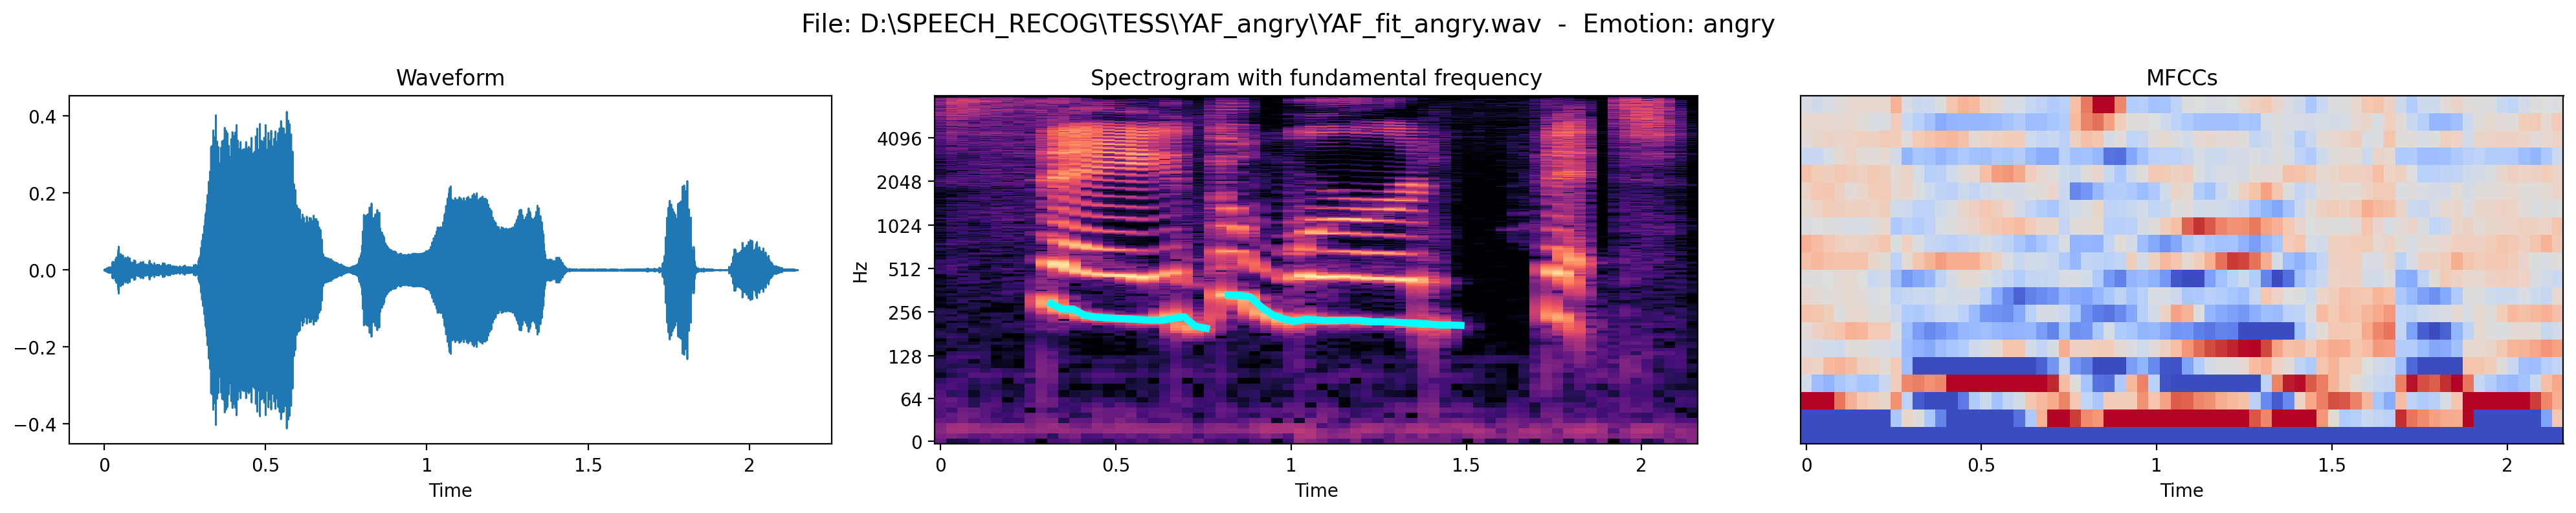

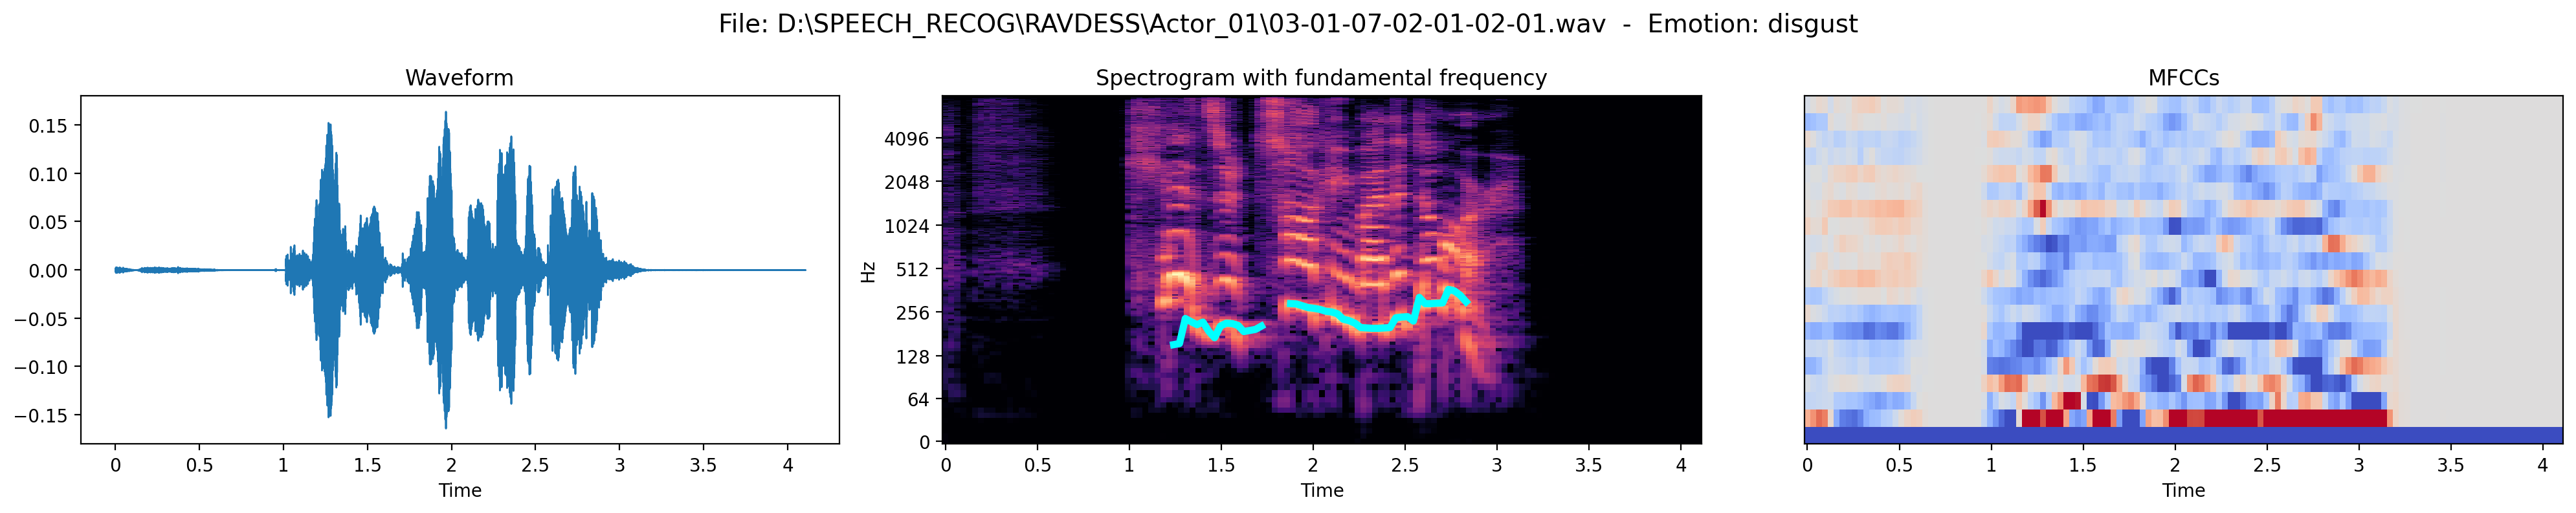

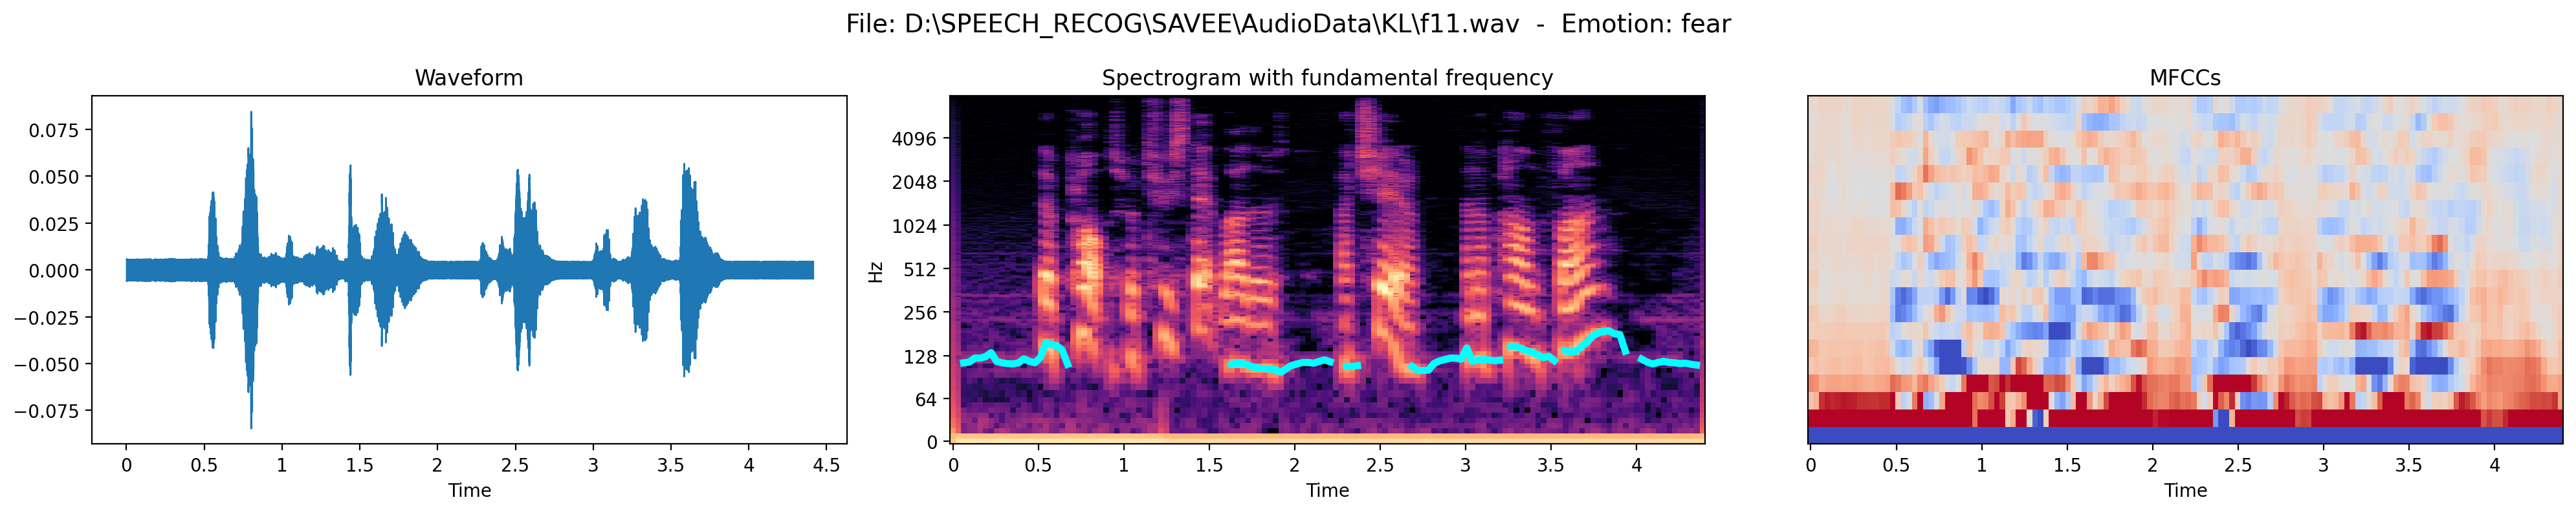

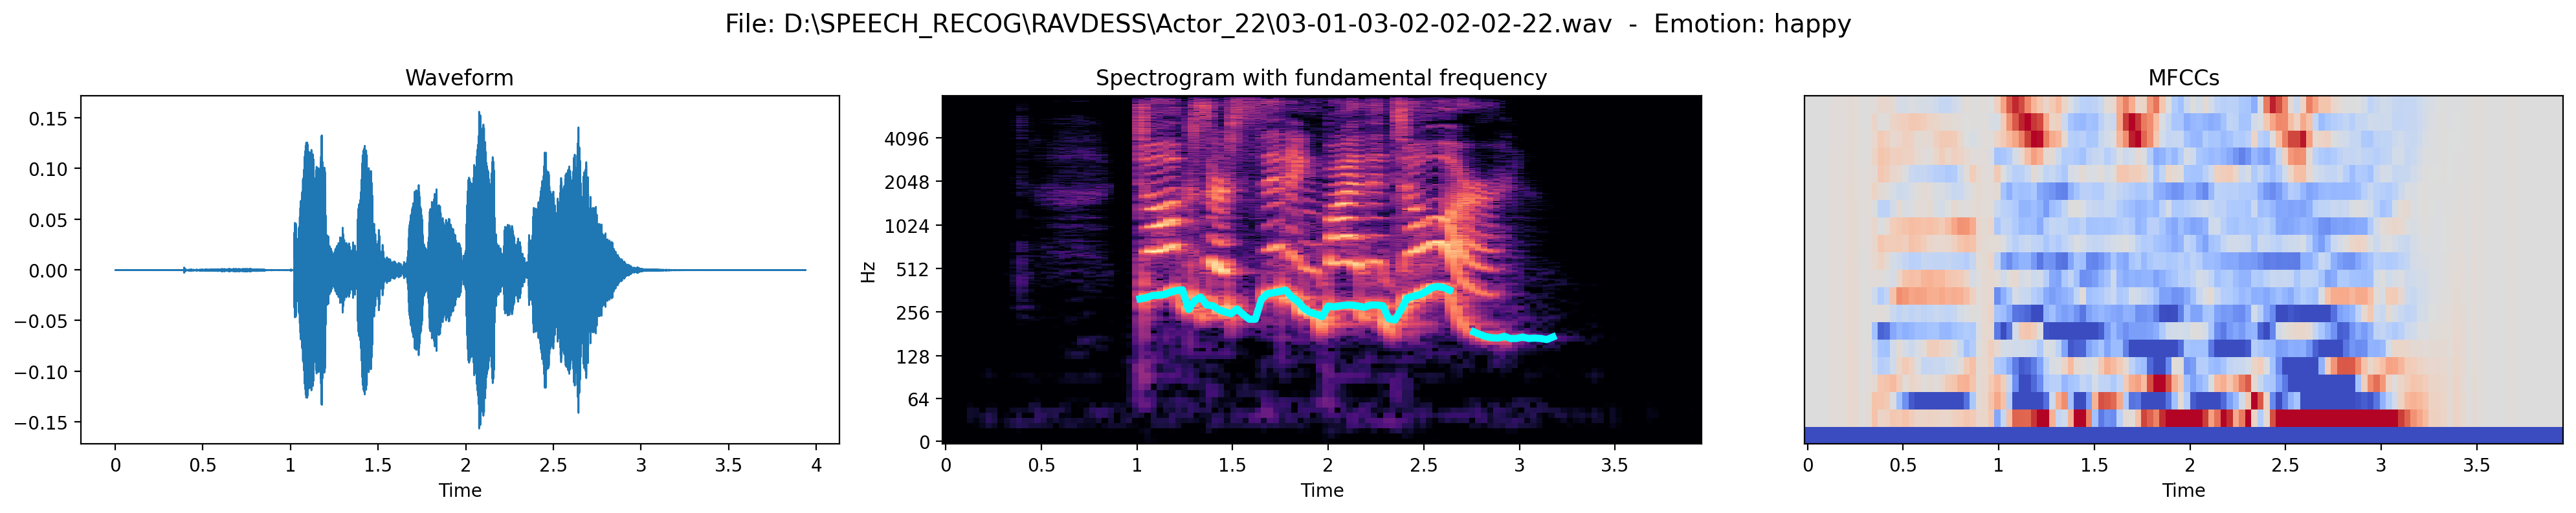

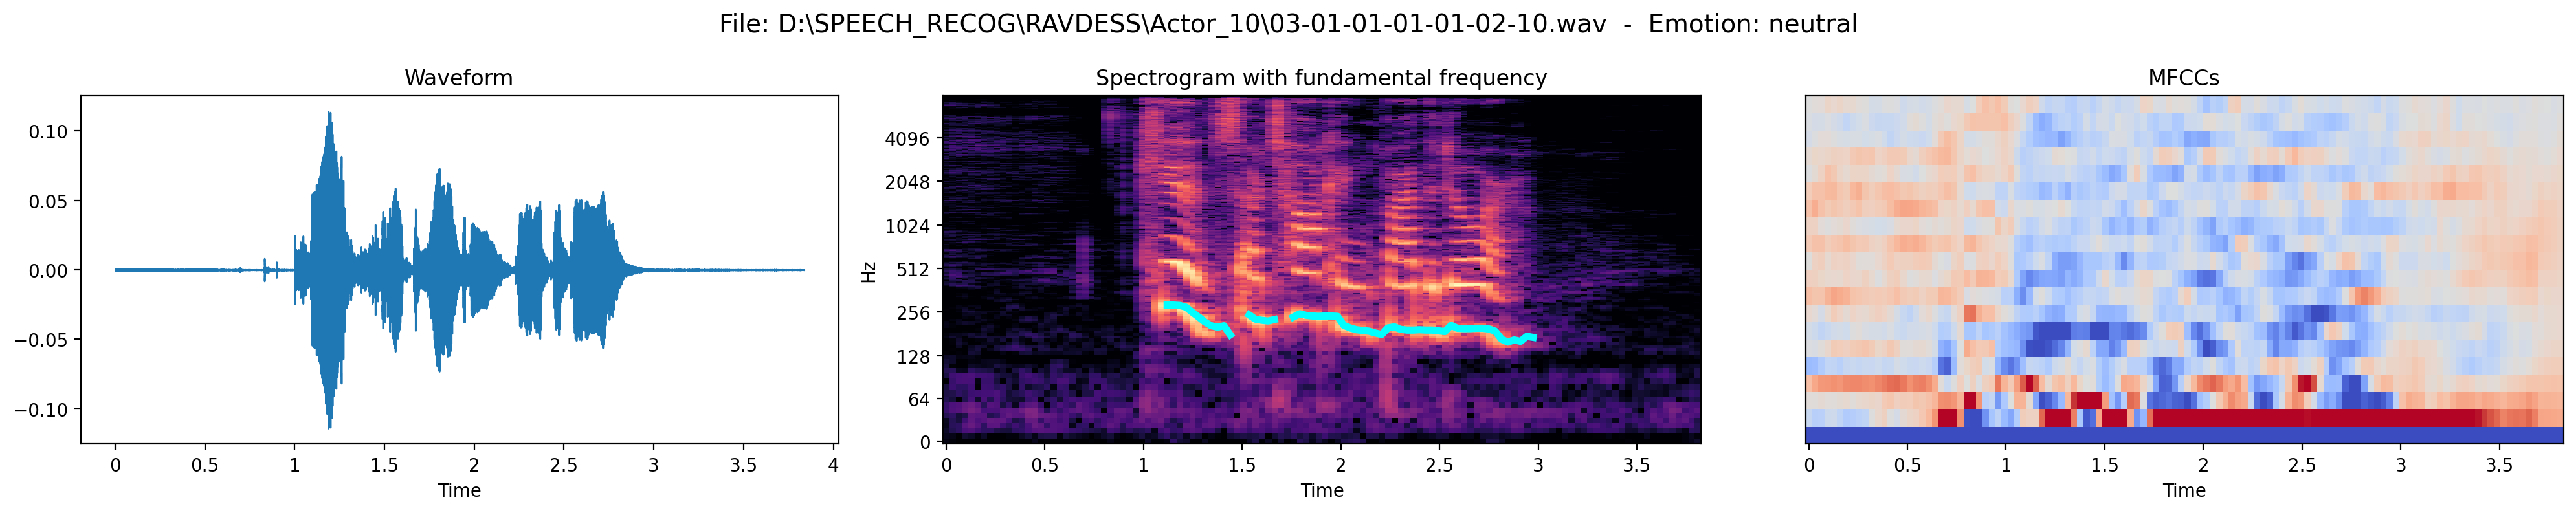

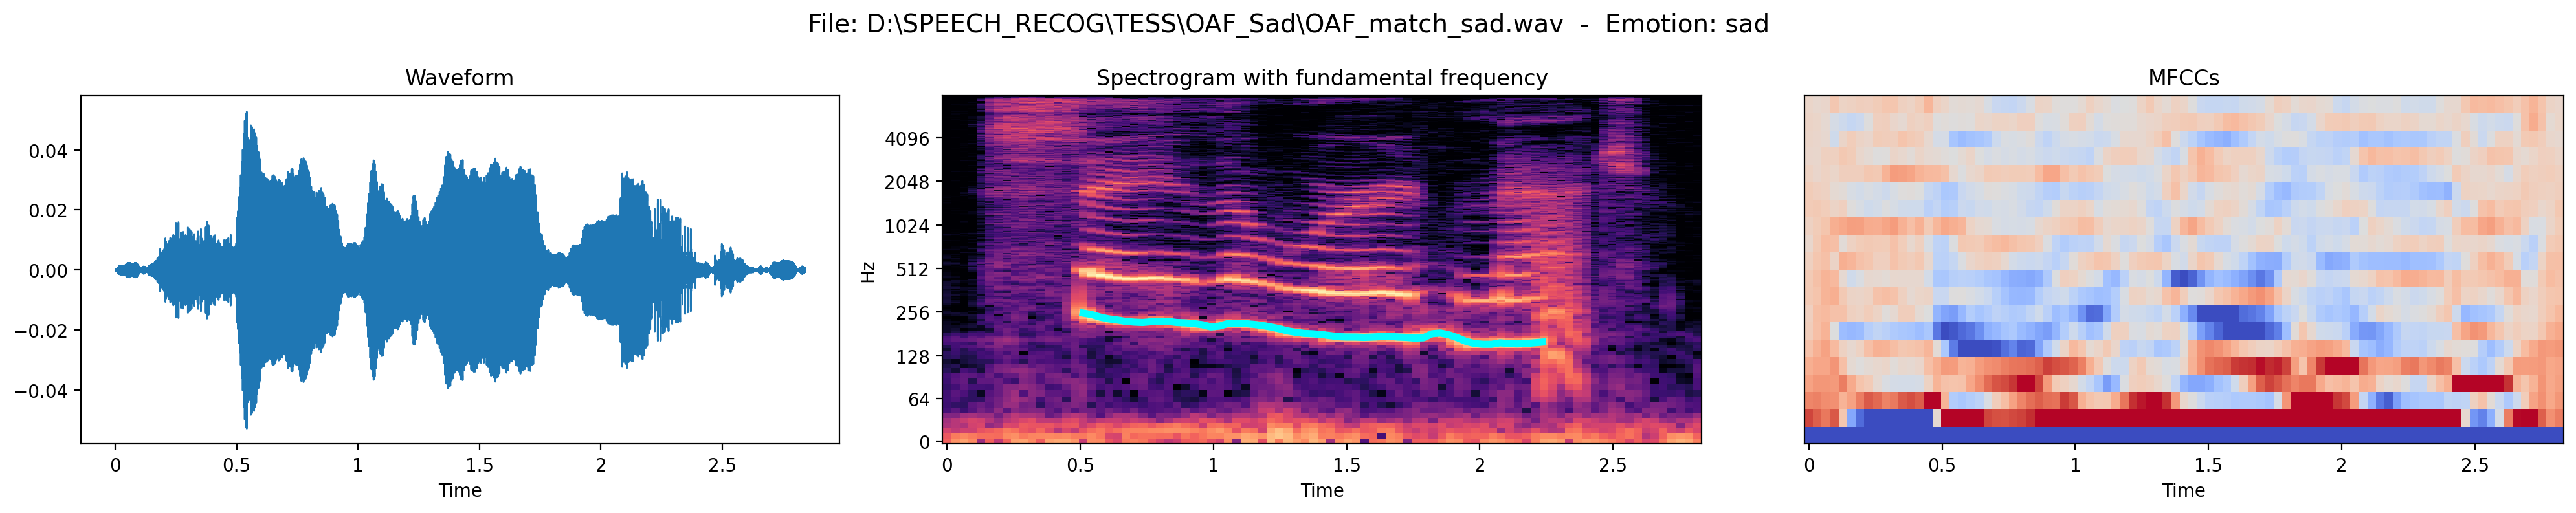

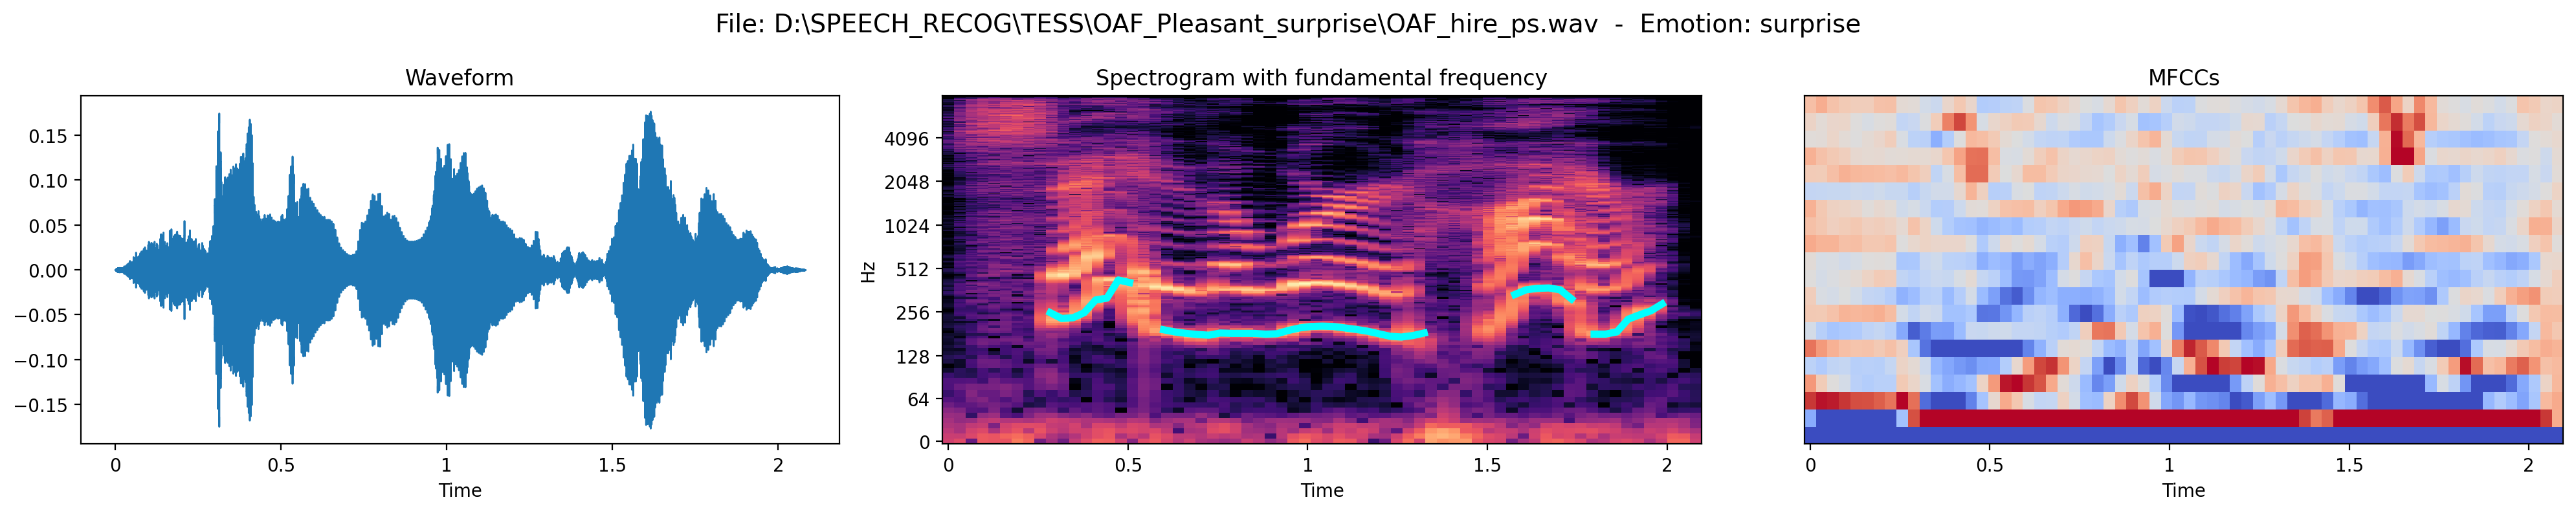

In [14]:
emotions = sorted(list(df.emotion.unique()))

# Get waveforms, spectograms, mfccs and media player for each emotion
for emotion in emotions:
    show_audio(emotion)

In [15]:
%%time

# Create a variable where to store the mfccs data
mfccs = []

for file in df.path:
    # load audio file:
    y, sr = librosa.load(file, sr=16000)
    
    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    mfccs.append(librosa.feature.mfcc(y=y, sr=sr, fmin=50, n_mfcc=30))

CPU times: total: 18.2 s
Wall time: 49.2 s


In [16]:
# Define function to resize the 2D arrays
def resize_array(array):
    new_matrix = np.zeros((30,150))   # Initialize the new matrix shape with an array 30X150 of zeros
    for i in range(30):               # Iterate rows
        for j in range(150):          # Iterate columns
            try:                                 # the mfccs of a sample will replace the matrix of zeros, then cutting the array up to 150
                new_matrix[i][j] = array[i][j]
            except IndexError:                   # if mfccs of a sample is shorter than 150, then keep looping to extend lenght to 150 with 0s
                pass
    return new_matrix

# Create a variable to store the new resized mfccs and apply function for all the extracted mfccs
resized_mfccs = []

for mfcc in mfccs:
    resized_mfccs.append(resize_array(mfcc))

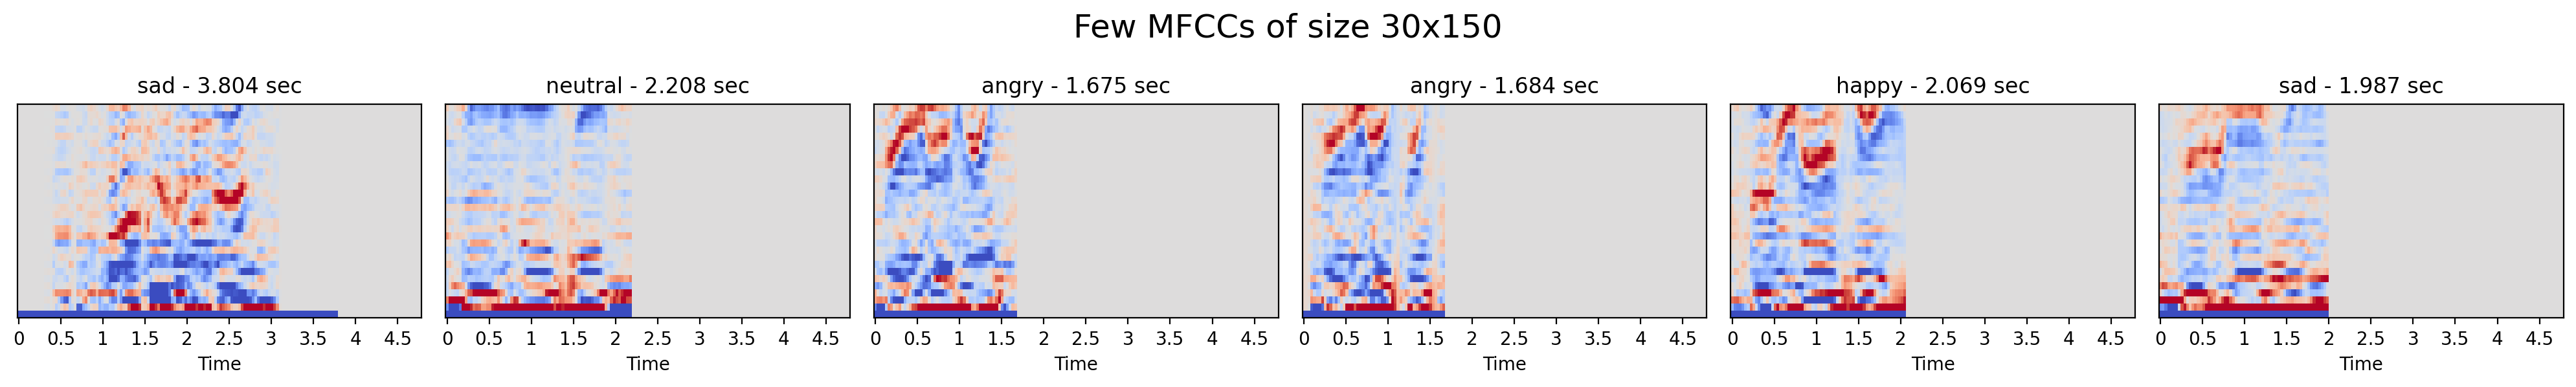

In [17]:
# Create sublots
fig, axs = plt.subplots(nrows=1,ncols=6, figsize=(20,3))

# Select 6 random MFCCs
for i in range(6):
    index = random.randint(0, len(resized_mfccs))
    
    # Plot MFCCs
    librosa.display.specshow(resized_mfccs[index], sr=sr, x_axis="time", ax=axs[i], norm=Normalize(vmin=-50, vmax=50))
    axs[i].set_title(str(df.emotion[index]) + ' - ' + str(df.duration[index]) + ' sec')

plt.suptitle('Few MFCCs of size 30x150', size=18)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Select target
df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}, inplace=True)
y = df.emotion.values

# Features
X = resized_mfccs.copy()

# Create train, validation and test set
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)
x_tr, x_va, y_tr, y_va = train_test_split(x_tr, y_tr, test_size=0.3, shuffle=True, random_state=0)

# Convert data to numpy arrays
x_tr = np.array([i for i in x_tr])
x_va = np.array([i for i in x_va])
x_te = np.array([i for i in x_te])

# Plot size of data
print(x_tr.shape)
print(x_va.shape)
print(x_te.shape)

(3638, 30, 150)
(1560, 30, 150)
(578, 30, 150)


In [19]:
# Get mean and standard deviation from the training set
tr_mean = np.mean(x_tr, axis=0)
tr_std = np.std(x_tr, axis=0)

# Apply data scaling
x_tr = (x_tr - tr_mean)/tr_std
x_va = (x_va - tr_mean)/tr_std
x_te = (x_te - tr_mean)/tr_std

In [20]:
print(f"x_tr has a dimension of {x_tr.shape} before the manipulation.")

x_tr = x_tr[..., None]
x_va = x_va[..., None]
x_te = x_te[..., None]

print(f"x_tr has a dimension of {x_tr.shape} after the manipulation.")

x_tr has a dimension of (3638, 30, 150) before the manipulation.
x_tr has a dimension of (3638, 30, 150, 1) after the manipulation.


In [21]:
from tensorflow import keras
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D)
from tensorflow.keras import initializers

# Create convolutional neural network and return summary
model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation="relu", input_shape=x_tr.shape[1:]))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=4, strides=(2, 1), activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 73, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 36, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6, 36, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 33, 32)      │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 16, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,223 (426.65 KB)

 Trainable params: 109,031 (425.90 KB)

 Non-trainable params: 192 (768.00 B)

In [22]:
# Compile the model using Adam's default learning rate
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Create 'EarlyStopping' callback
earlystopping_cb = keras.callbacks.EarlyStopping(patience=5)

In [23]:
%%time

#  Train the neural network
history = model.fit(
    x=x_tr,
    y=y_tr,
    epochs=100,
    batch_size=32,
    validation_data=(x_va, y_va),
    callbacks=[earlystopping_cb]
)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1884 - loss: 2.8827 - val_accuracy: 0.2103 - val_loss: 1.8500
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2962 - loss: 1.9191 - val_accuracy: 0.4801 - val_loss: 1.6145
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3759 - loss: 1.6155 - val_accuracy: 0.6186 - val_loss: 1.1949
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4702 - loss: 1.4027 - val_accuracy: 0.6494 - val_loss: 1.0057
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5170 - loss: 1.2599 - val_accuracy: 0.6776 - val_loss: 0.9387
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5649 - loss: 1.1392 - val_accuracy: 0.6769 - val_loss: 0.9082
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5826 - loss: 1.0968 - val_accuracy: 0.6853 - val_loss: 0.8905
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5989 - loss: 1.0573 - 

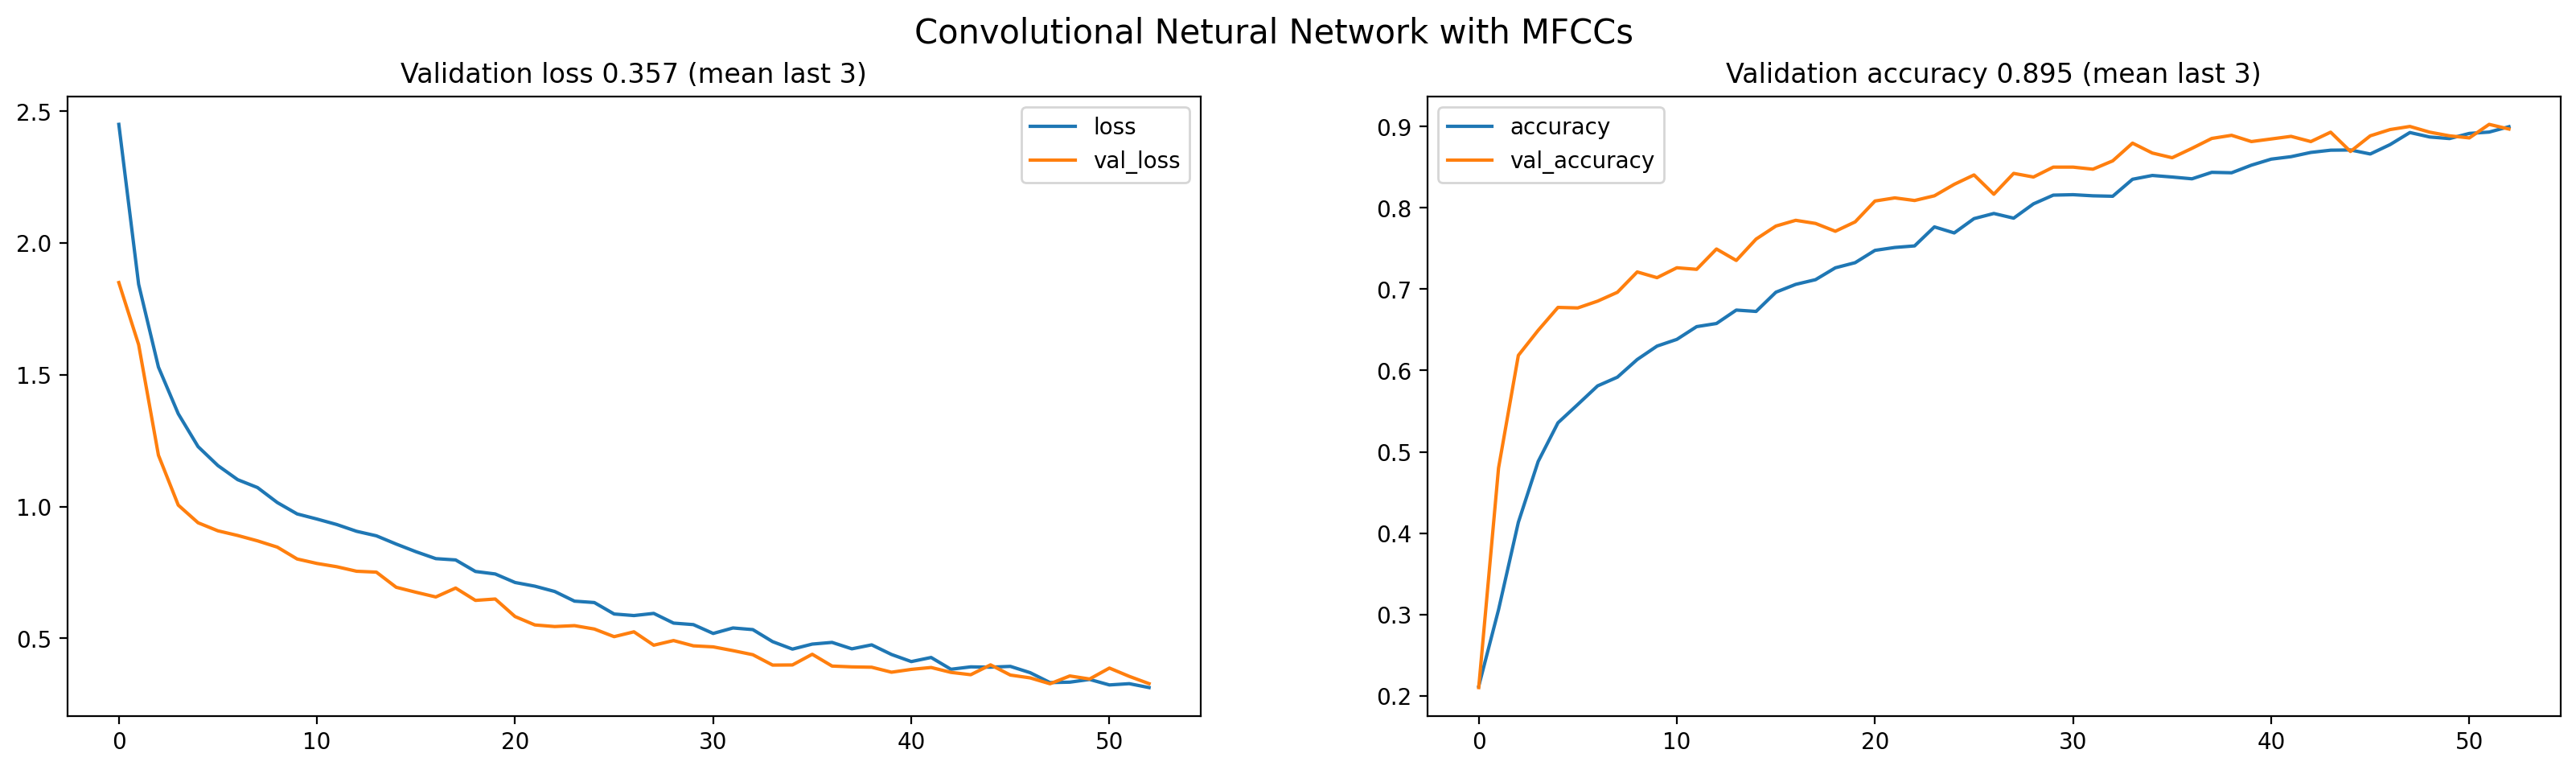

In [24]:
# Plots neural network performance metrics for train and validation
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Convolutional Netural Network with MFCCs', size=15)
results = pd.DataFrame(history.history)
results[["loss", "val_loss"]].plot(ax=axs[0])
axs[0].set_title("Validation loss {:.3f} (mean last 3)".format(np.mean(history.history["val_loss"][-3:])))
results[["accuracy", "val_accuracy"]].plot(ax=axs[1])
axs[1].set_title("Validation accuracy {:.3f} (mean last 3)".format(np.mean(history.history["val_accuracy"][-3:])))
plt.show()

In [25]:
loss_te, accuracy_te = model.evaluate(x_te, y_te)

print("Test loss: {:.2f}".format(loss_te))
print("Test accuracy: {:.2f}%".format(100 * accuracy_te))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8861 - loss: 0.3639
Test loss: 0.32
Test accuracy: 89.62%


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


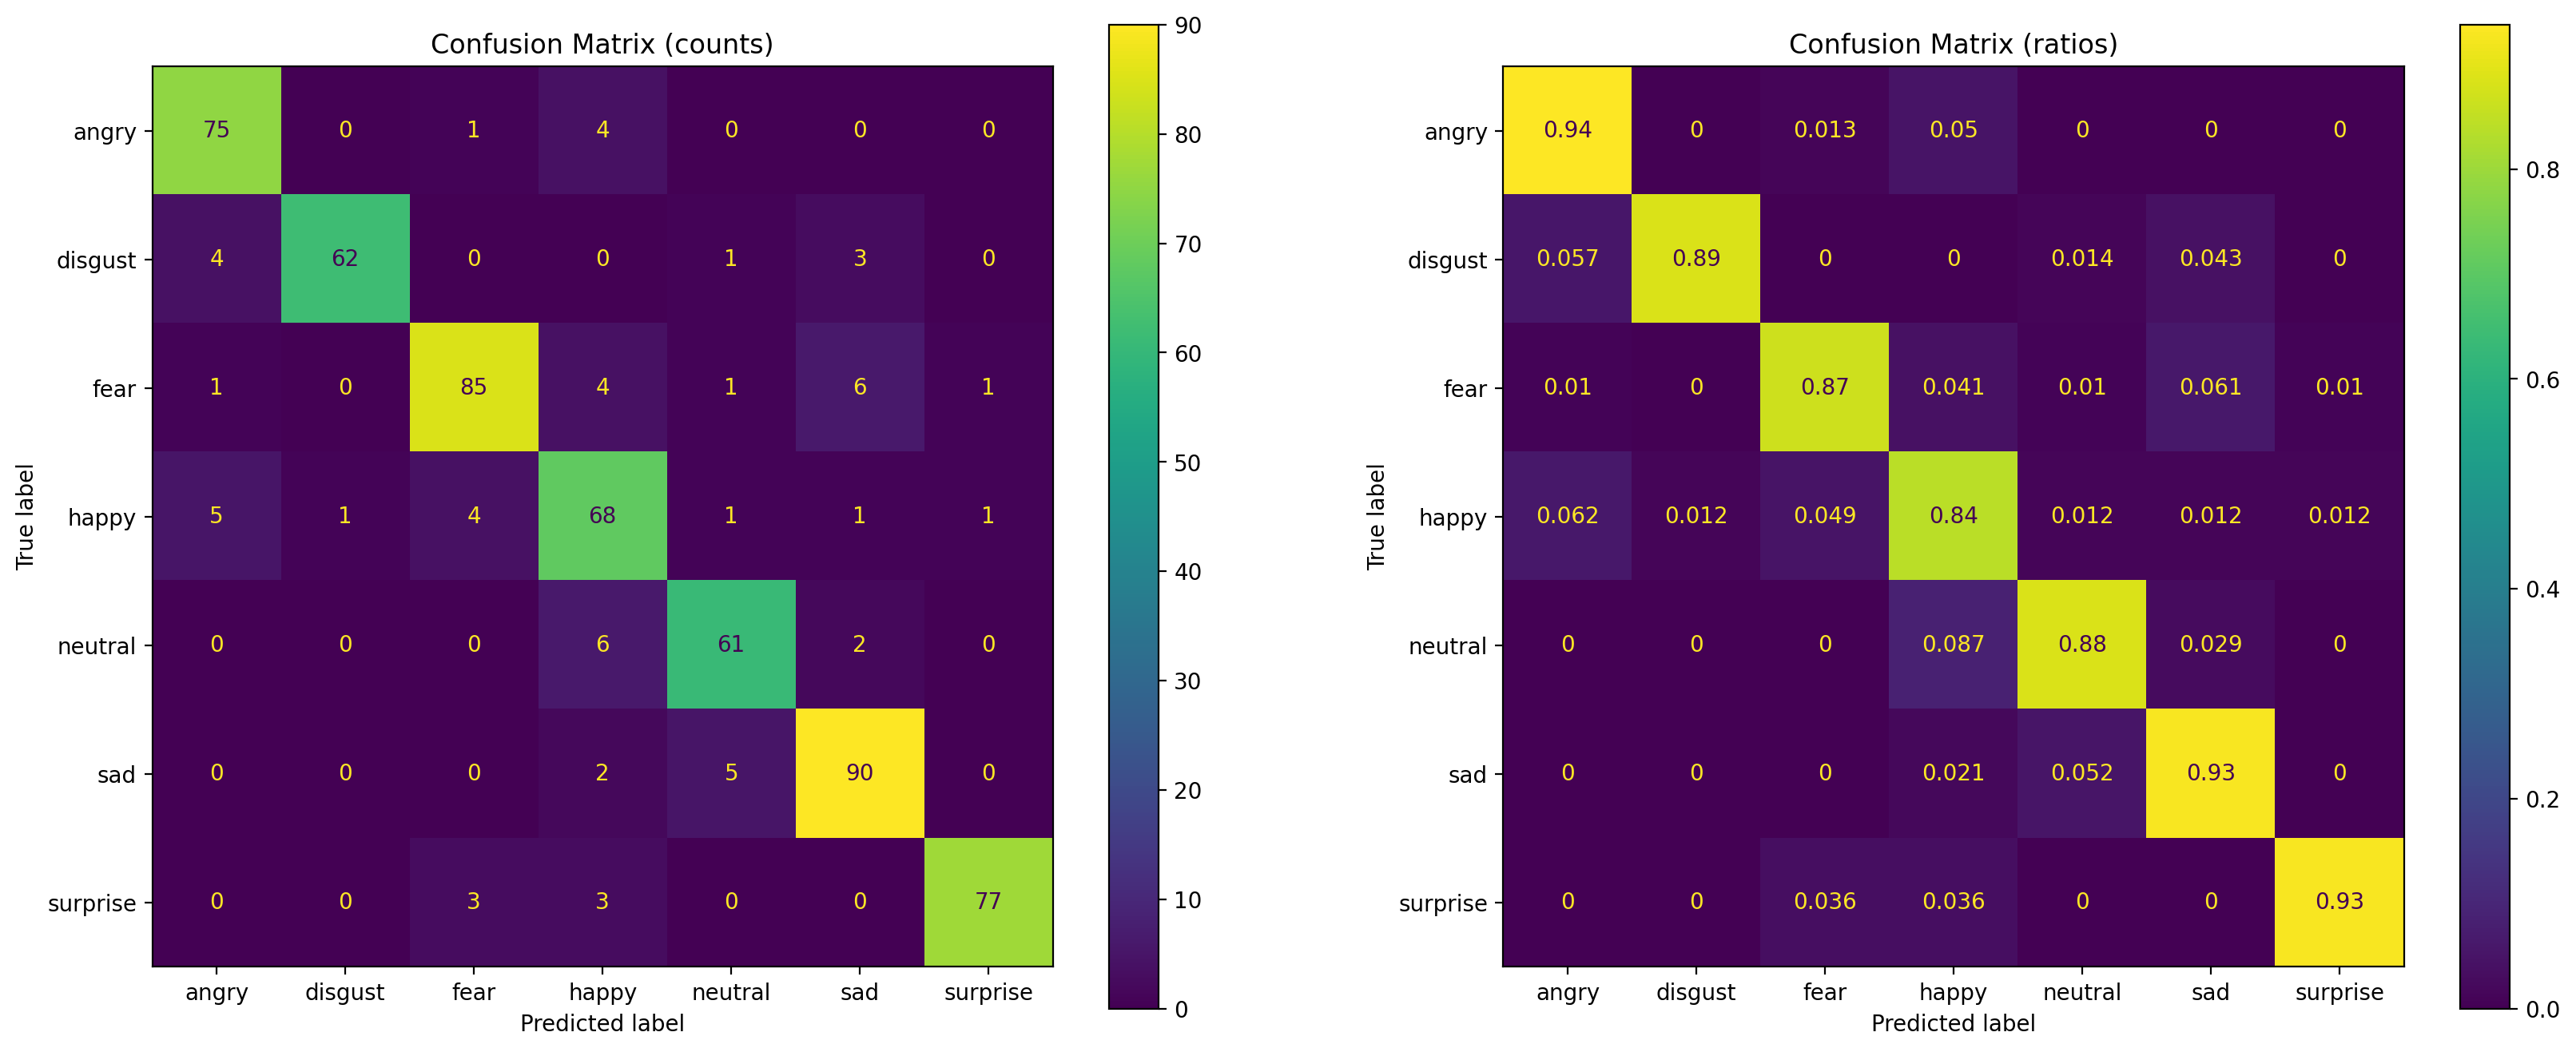

In [26]:
predictions = model.predict(x_te)

pred = []

for i in predictions:
    pred.append(np.argmax(i))
    
from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def plot_confusion_matrices(y_true, y_pred):

    # Create two subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plots the standard confusion matrix
    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    # Plots the normalized confusion matrix
    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="true", ax=ax2)

    plt.show()

# Plot confusion matrices
plot_confusion_matrices(y_te, pred)

In [27]:
model.save('all_speech_recog.h5')

***INFERENCE SESSION***

In [28]:
from tensorflow.keras.models import load_model
inf_model = load_model('D:/SPEECH_RECOG/all_speech_recog.h5')

In [29]:
inf_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 73, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 36, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6, 36, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 33, 32)      │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 16, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,225 (426.66 KB)

 Trainable params: 109,031 (425.90 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [90]:
"""from IPython.display import Audio
#def inf(audio_path):
audio_path="D:/SPEECH_RECOG/CREMA/1001_ITS_HAP_XX.wav"
z, sz = librosa.load(audio_path, sr=16000)
mfc=librosa.feature.mfcc(y=z, sr=sz, fmin=50, n_mfcc=30)
rez_mfc=resize_array(mfc)
rez_mfc=np.array([rez_mfc])
rez_mfc.shape
Audio(audio_path)"""

In [30]:
def inf(audio_path):
    z, sz = librosa.load(audio_path, sr=16000)
    mfc=librosa.feature.mfcc(y=z, sr=sz, fmin=50, n_mfcc=30)
    rez_mfc=resize_array(mfc)
    rez_mfc=np.array(rez_mfc)
    mfcc_standardized = (rez_mfc - tr_mean) / tr_std
    mfcc_standardized = mfcc_standardized[..., np.newaxis]
    mfcc_standardized = mfcc_standardized[np.newaxis, ...]
    predictions = model.predict(mfcc_standardized)
    predicted_emotion = np.argmax(predictions, axis=1)[0]
    emotion_map = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
    predicted_emotion_label = emotion_map[predicted_emotion]
    return(predicted_emotion_label)

In [31]:
file_dir="D:/NEW_AUDIO.wav"
print(inf(file_dir))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
disgust


In [32]:
np.save('tr_mean.npy', tr_mean)
np.save('tr_std.npy', tr_std)

In [33]:
print(tr_mean.shape)

(30, 150)
